In [352]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [353]:
data = pd.read_csv('advertising.csv')

In [354]:
X = data[['TV','Radio','Newspaper']]
Y = data['Sales']

In [355]:
X.shape

(200, 3)

In [356]:
Y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

# Normalize Features

In [357]:
X = (X - X.mean()) / X.std()

In [358]:
X

,TV,Radio,Newspaper
0,0.967425,0.979066,1.774493
1,-1.194379,1.080097,0.667903
2,-1.512360,1.524637,1.779084
3,0.051919,1.214806,1.283185
4,0.393196,-0.839507,1.278593
...,...,...,...
195,-1.267759,-1.317724,-0.769287
196,-0.615491,-1.236899,-1.031011
197,0.348934,-0.940539,-1.109069
198,1.590574,1.261955,1.636743


# Add 1s Column to perform vectorized gradient descent

In [359]:
X = np.c_[np.ones(X.shape[0]), X] 

In [360]:
X.shape

(200, 4)

In [361]:
theta = np.zeros(X.shape[1])

In [362]:
def cost_function(X,Y,theta):
    m = len(Y)
    error = np.dot(X,theta.T) - Y
    cost = 1 / (2 * m) * np.dot(error.T,error)
    return cost,error

In [363]:
def gradient_descent(X,Y,theta,lr=0.001,iterations=1000):
    
    m = len(X)
    cost_array = []
    for i in range(iterations) :
        
        cost, error = cost_function(X,Y,theta)
        theta = theta - (lr * (1/m) * np.dot(X.T, error))
        cost_array.append((cost))
    return theta,cost_array

In [364]:
iterations = 2000
initial_cost_error, _ = cost_function(X, Y, theta)

print('With initial theta values of {0}, cost error is {1}'.format(theta, initial_cost_error))

theta,cost_array = gradient_descent(X,Y,theta,0.01,iterations)

final_cost_error,_ = cost_function(X,Y,theta)

print('With final theta values of {0}, cost error is {1}'.format(theta,final_cost_error))

With initial theta values of [0. 0. 0. 0.], cost error is 111.858125
With final theta values of [14.02249997  3.92908866  2.79906562 -0.0225916 ], cost error is 1.392063157263649


In [365]:
def plotCost(iterations,cost_array) :
    
    fig,ax = plt.subplots()
    ax.plot(np.arange(iterations),cost_array,'g')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    plt.show()

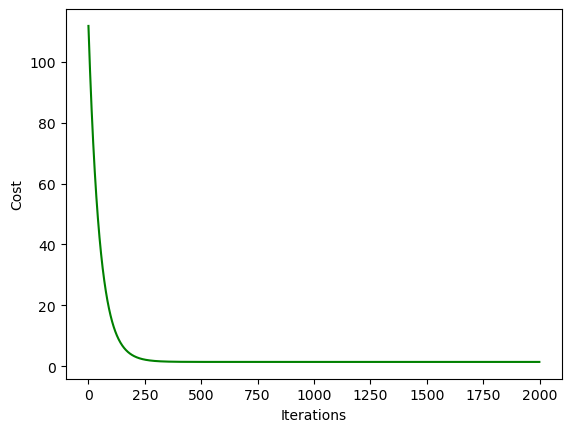

In [366]:
plotCost(iterations,cost_array)